### Stock Market Prediction using Stacked LSTM

In [37]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [38]:
#LOAD DATA
data= pd.read_csv('NFLX.csv')

In [39]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [41]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [42]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [43]:
#check for null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [44]:
#sort with date
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [45]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [46]:
df.reset_index(inplace=True)

In [47]:
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


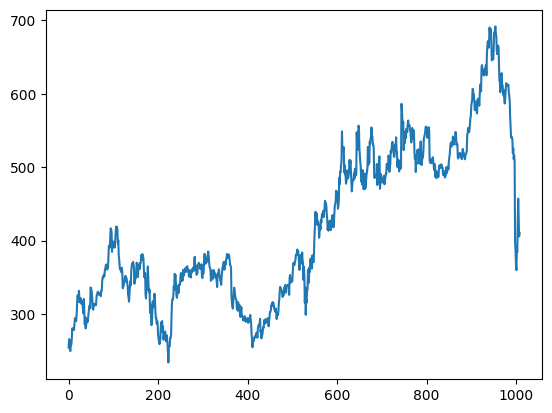

In [48]:
plt.plot(df['Close'])

In [49]:
df1=df['Close']

# PREPARE DATA

In [50]:
##LSTM Are Sensitive to the scale of the data, therefore applying MinMax scaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [51]:
##splitting dataset into train and test split 
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [52]:
training_size,test_size

(706, 303)

In [53]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
            a= dataset[i:(i+time_step) ,0] ###i=0, 0,1,2,3---99 100
            dataX.append(a)
            dataY.append(dataset[i + time_step , 0])
    return np.array(dataX) ,np.array(dataY)  

In [54]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [55]:
print(X_train.shape), print(y_train.shape)

(605, 100)
(605,)


(None, None)

In [56]:
print(X_test.shape), print(ytest.shape)

(202, 100)
(202,)


(None, None)

In [57]:
#reshape input to be[samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] ,1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

### MODEL BUILDING

In [58]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [59]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
9/9 [==============================] - 11s 339ms/step - loss: 0.0338 - val_loss: 0.0073
Epoch 2/60
9/9 [==============================] - 1s 163ms/step - loss: 0.0080 - val_loss: 0.0210
Epoch 3/60
9/9 [==============================] - 1s 159ms/step - loss: 0.0052 - val_loss: 0.0075
Epoch 4/60
9/9 [==============================] - 1s 160ms/step - loss: 0.0040 - val_loss: 0.0051
Epoch 5/60
9/9 [==============================] - 1s 158ms/step - loss: 0.0034 - val_loss: 0.0061
Epoch 6/60
9/9 [==============================] - 1s 160ms/step - loss: 0.0030 - val_loss: 0.0076
Epoch 7/60
9/9 [==============================] - 1s 165ms/step - loss: 0.0027 - val_loss: 0.0048
Epoch 8/60
9/9 [==============================] - 2s 178ms/step - loss: 0.0025 - val_loss: 0.0048
Epoch 9/60
9/9 [==============================] - 2s 182ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 10/60
9/9 [==============================] - 2s 196ms/step - loss: 0.0025 - val_loss: 0.0059
Epoch 11/60
9/9 [=

In [61]:
## lets do the prediction and check performance metrics
test_predict= model.predict(X_test)

7/7 [==============================] - 1s 31ms/step


In [62]:
## Transform back to original form
test_predict1=scaler.inverse_transform(test_predict)

In [63]:
test_predict1

array([[552.468  ],
       [551.8589 ],
       [546.15356],
       [537.67883],
       [528.38245],
       [520.6171 ],
       [514.46326],
       [510.27643],
       [508.2007 ],
       [508.30112],
       [509.28543],
       [509.90924],
       [509.2627 ],
       [508.22247],
       [507.659  ],
       [505.5269 ],
       [503.46548],
       [500.60968],
       [497.70807],
       [495.9413 ],
       [494.69586],
       [493.552  ],
       [492.6877 ],
       [493.71332],
       [495.55093],
       [498.18173],
       [500.78458],
       [503.06424],
       [504.9682 ],
       [506.23813],
       [506.44574],
       [505.88937],
       [503.73605],
       [501.3513 ],
       [499.19672],
       [497.23077],
       [494.83426],
       [492.5415 ],
       [490.79645],
       [490.96085],
       [491.55872],
       [492.29984],
       [493.68713],
       [495.66815],
       [497.36676],
       [499.99304],
       [503.49146],
       [507.79337],
       [513.17926],
       [519.3608 ],


In [64]:
##calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

0.05513043809514566